# Machine Learning Workshop 
### Remote 
### 18th March 2023

_____
# 01 - Introduction to Machine Learning

by [Jesus Solano](https://linkedin.com/in/jesus-solano-go) and [Alejandro Correa Bahnsen](albahnsen.com/)

version 1.4, March 2023

This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [Rick Muller](http://www.cs.sandia.gov/~rmuller/), Sandia National Laboratories
____

## What is Machine Learning?

In this section we will begin to explore the basic principles of machine learning.
Machine Learning is about building programs with **tunable parameters** (typically an
array of floating point values) that are adjusted automatically so as to improve
their behavior by **adapting to previously seen data.**

Machine Learning can be considered a subfield of **Artificial Intelligence** since those
algorithms can be seen as building blocks to make computers learn to behave more
intelligently by somehow **generalizing** rather that just storing and retrieving data items
like a database system would do.

We'll take a look at two very simple machine learning tasks here.
* Classification
* Regression

### Classification
The first is a **classification** task: the figure shows a
collection of two-dimensional data, colored according to two different class
labels. 

In [1]:
# Import libraries
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set();
cmap = mpl.colors.ListedColormap(sns.color_palette("Set2", 3))

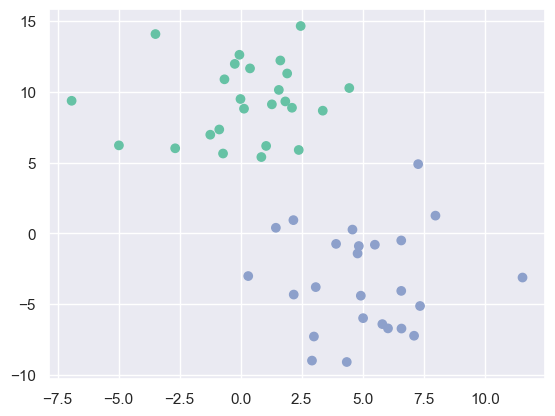

In [3]:
# Create a random set of examples
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=50, centers=2,random_state=23, cluster_std=2.90)

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap)
plt.show()

A classification algorithm may be used to draw a dividing boundary
between the two clusters of points:

In [4]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=300, tol= 0.001, fit_intercept=True)
clf.fit(X, Y)

SGDClassifier(alpha=0.01, max_iter=300)

In [5]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .05), np.arange(y_min, y_max, .05))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

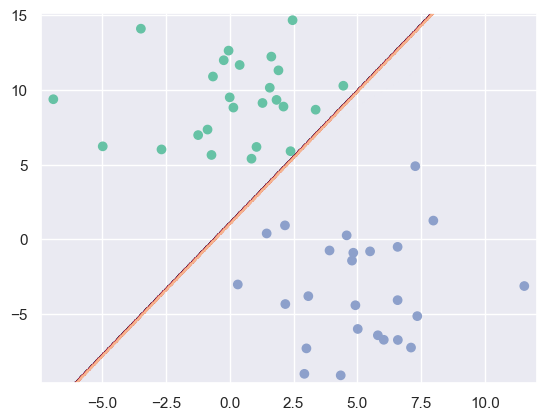

In [6]:
plt.contour(xx, yy, Z)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap)
plt.show()

This may seem like a trivial task, but it is a simple version of a very important concept.
By drawing this separating line, we have learned a model which can **generalize** to new
data: if you were to drop another point onto the plane which is unlabeled, this algorithm
could now **predict** whether it's a blue or a red point.

### Regression 
The next simple task we'll look at is a **regression** task, which is finding the relationship between a set of independent variables (X) and a target variable (y). Let's start by a simple best-fit line:

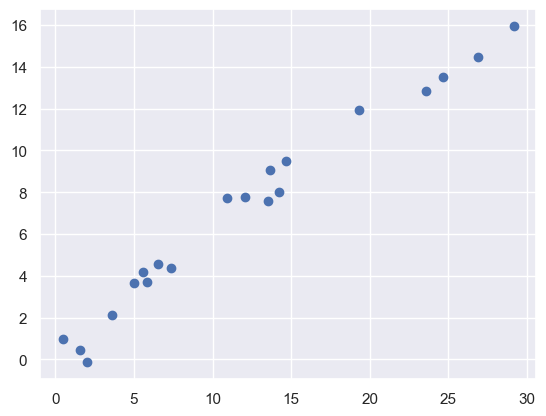

In [21]:
a = 0.5
b = 1.0

# x from 0 to 10
x = 30 * np.random.random(20)

# y = a*x + b with noise
y = a * x + b + np.random.normal(size=x.shape)

plt.scatter(x, y)
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x[:, None], y)

LinearRegression()

In [23]:
# underscore at the end indicates a fit parameter
print(clf.coef_)
print(clf.intercept_)

[0.5432805]
0.5777532192320649


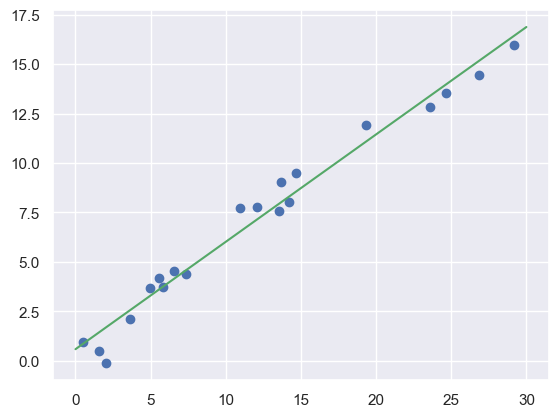

In [24]:
x_new = np.linspace(0, 30, 100)
y_new = clf.predict(x_new[:, None])
plt.scatter(x, y)
plt.plot(x_new, y_new, 'g-')
plt.show()

Again, this is an example of fitting a model to data, such that the model can make
generalizations about new data.  The model has been **learned** from the training
data, and can be used to predict the result of test data:
here, we might be given an x-value, and the model would
allow us to predict the y value.  Again, this might seem like a trivial problem,
but it is a basic example of a type of operation that is fundamental to
machine learning tasks.

## A more realist (but simple) Example: the Iris Dataset

As an example of a simple dataset, we're going to take a look at the iris data stored by scikit-learn.
The data consists of measurements of three different species of irises.
There are three species of iris in the dataset, which we can picture here:

In [10]:
from IPython.display import Image, display
print("Classes in Iris Dataset")
display(Image(url='https://machinelearninghd.com/wp-content/uploads/2021/03/iris-dataset.png'))


Classes in Iris Dataset


### Quick Question:

**If we want to design an algorithm to recognize iris species, what could we do?**

First, we need to encode the information in each image into a numerical vector (*machines can only read numerical features*)

- How could we encode the information into features?
    - Manually -> Feature Engineering + Traditional ML (Today :D)
    - Automatically -> Deep Learning (Next Saturday!)

Let's start by thinking what kind of features engineering we could do. 

- What kind of features (`n_features`) we could measure in each picture (`sample`)? 
- What might the `n features` refer to? Numbers? Vectors?

**Some technical considerations...**

Remember: we need a 2D array of size `[n_samples x n_features]`.

- What would the `n_samples` refer to?

- What might the `n_features` refer to?

Remember that there must be a **fixed** number of features for each sample, and feature
number ``i`` must be a similar kind of quantity for each sample.

#### Loading the Iris Data with Scikit-Learn

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  
``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [26]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

#### Understanding the dataset

In [27]:
n_samples, n_features = iris.data.shape
print(f'The dataset has {n_samples} samples, each one with  {n_features} features.')
print(f'Below you can see the computed features for the first sample: \n {iris.data[0]}')

The dataset has 150 samples, each one with  4 features.
Below you can see the computed features for the first sample: 
 [5.1 3.5 1.4 0.2]


In [28]:
print('What is the shape of the n_features (X)?')
print(iris.data.shape)
print('What is the shape of the target (y)?')
print(iris.target.shape)

What is the shape of the n_features (X)?
(150, 4)
What is the shape of the target (y)?
(150,)


In [29]:
print(iris.target)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


This data is four dimensional, but we can visualize two of the dimensions
at a time using a simple scatter-plot:

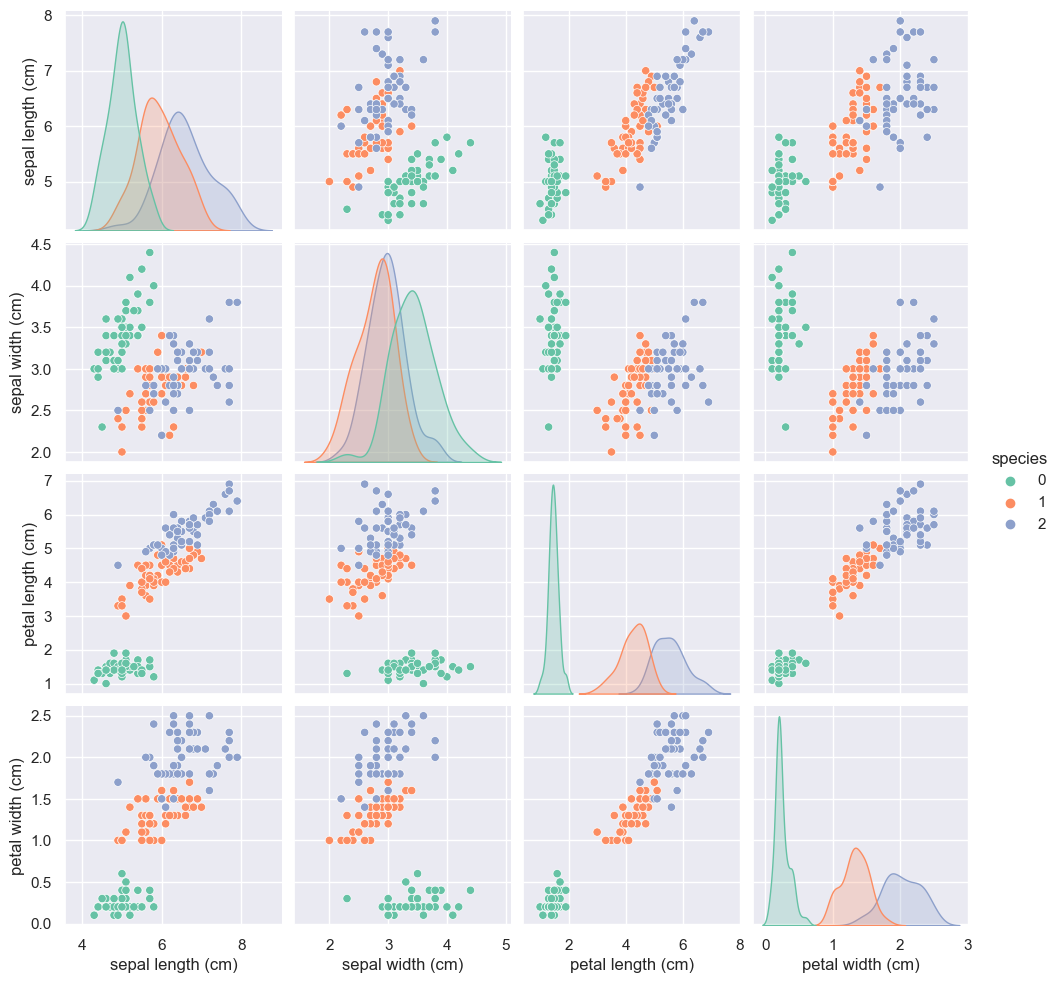

In [30]:
import pandas as pd  
data_temp = pd.DataFrame(iris.data, columns=iris.feature_names)
data_temp['species'] = iris.target
data_temp['species'] = data_temp['species'].astype('category')
data_temp['species'].cat.rename_categories(iris.target_names)
sns.pairplot(data_temp, hue='species', palette=sns.color_palette("Set2", 3))
plt.show()

In [33]:
# Take out a test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_temp, test_size = 0.3, stratify = data_temp['species'], random_state = 42)

#### Classification

In [35]:
# Get features and target variable
target_var_name = 'species'
X_train = train.drop(columns=[target_var_name])
y_train = train[[target_var_name]]
X_test = test.drop(columns=[target_var_name])
y_test = test[[target_var_name]]

In [36]:
# Fit a ML classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
clf_dt.fit(X_train,y_train)
y_pred_test = clf_dt.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(y_pred_test,y_test)))

The accuracy of the Decision Tree is 0.933


In [37]:
# What is the importance of each feature when classifying?
clf_dt.feature_importances_

array([0.      , 0.      , 0.041423, 0.958577])

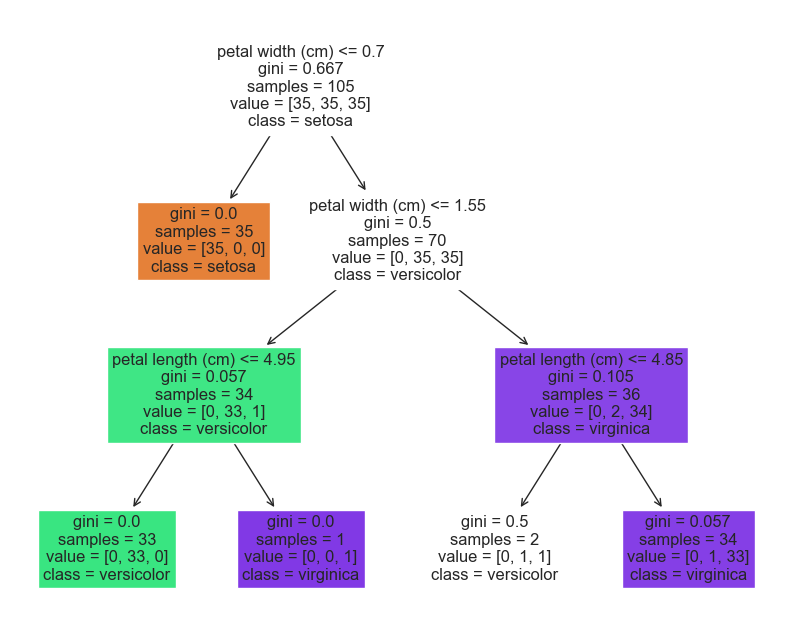

In [20]:
# Plot decision tree
from sklearn.tree import plot_tree
plt.figure(figsize = (10,8))
plot_tree(clf_dt, feature_names = iris.feature_names , class_names = iris.target_names, filled = True)
plt.show()

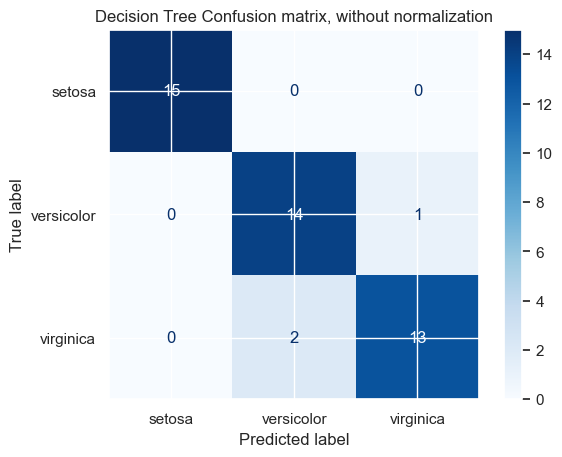

In [21]:
# Confusion Matrix
conf_plot = metrics.ConfusionMatrixDisplay.from_estimator(clf_dt, X_test, y_test,
                                 display_labels=iris.target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
conf_plot.ax_.set_title('Decision Tree Confusion matrix, without normalization')
plt.show()

#### Regression

In [38]:
# Get features and target variable
target_var_name = 'sepal width (cm)'
X_train = train.drop(columns=[target_var_name, 'species' ])
y_train = train[[target_var_name]].values.ravel()
X_test = test.drop(columns=[target_var_name, 'species'])
y_test = test[[target_var_name]].values.ravel()

In [41]:
from sklearn.svm import SVR
from sklearn import metrics
reg_svr = SVR(kernel="linear", C=100, gamma="auto")
reg_svr.fit(X_train, y_train)
y_pred_test = reg_svr.predict(X_test)
print('The Mean Absolute Percentage Error of the Support Vector Machine is',"{:.3f}".format(metrics.mean_absolute_percentage_error(y_pred_test.ravel(),y_test)))

The Mean Absolute Percentage Error of the Support Vector Machine is 0.064


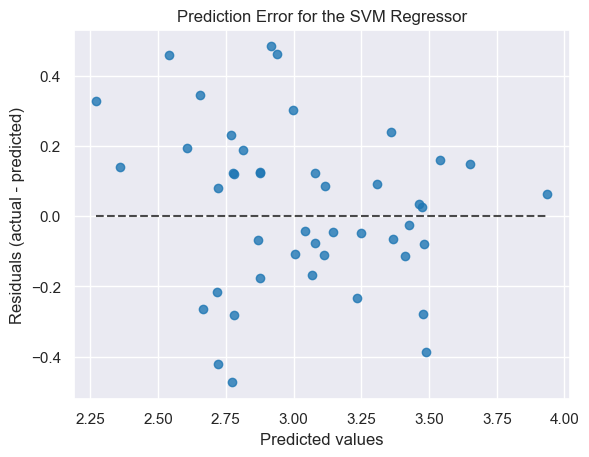

In [44]:
# Prediction Error Plot
conf_plot = metrics.PredictionErrorDisplay.from_estimator(reg_svr, X_test, 
                                                          y_test,
                                                         )
conf_plot.ax_.set_title('Prediction Error for the SVM Regressor')
plt.show()

## Motivating Support Vector Machines

Support Vector Machines (SVMs) are a powerful supervised learning algorithm used for **classification** or for **regression**. SVMs are a **discriminative** classifier: that is, they draw a boundary between clusters of data.

Let's show a quick example of support vector classification. First we need to create a dataset:

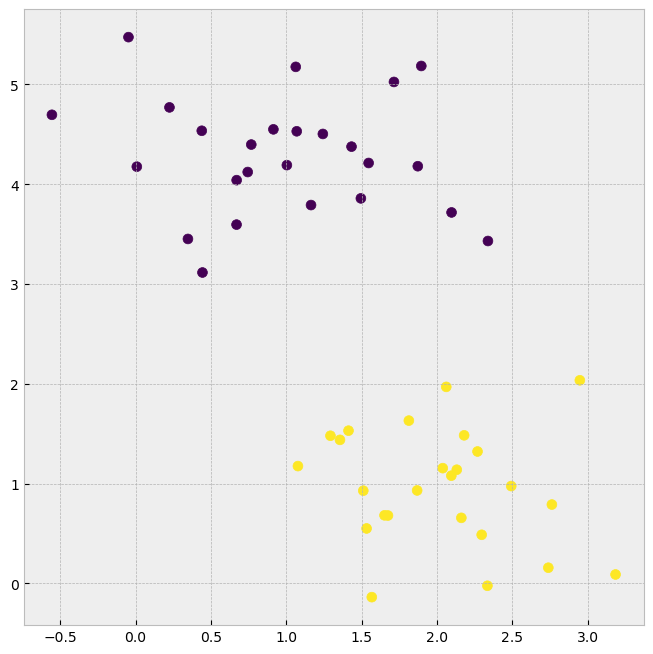

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

A discriminative classifier attempts to draw a line between the two sets of data. Immediately we see a problem: such a line is ill-posed! For example, we could come up with several possibilities which perfectly discriminate between the classes in this example:

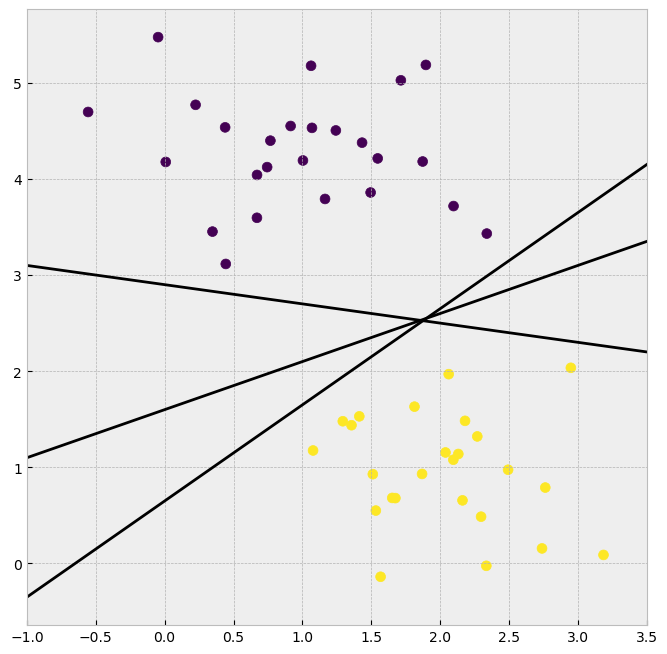

In [3]:
xfit = np.linspace(-1, 3.5)
plt.figure(figsize=(8,8))

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

These are three *very* different separaters which perfectly discriminate between these samples. Depending on which you choose, a new data point will be classified almost entirely differently!

How can we improve on this?

### Support Vector Machines: Maximizing the *Margin*

Support vector machines are one way to address this.
What support vector machined do is to not only draw a line, but consider a *region* about the line of some given width.  Here's an example of what it might look like:

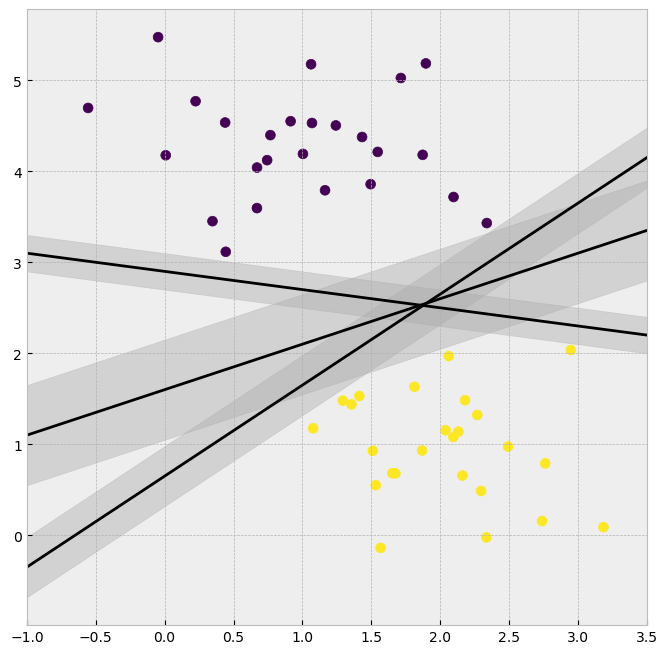

In [4]:
xfit = np.linspace(-1, 3.5)
plt.figure(figsize=(8,8))

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

Notice here that if we want to maximize this width, the middle fit is clearly the best.
This is the intuition of **support vector machines**, which optimize a linear discriminant model in conjunction with a **margin** representing the perpendicular distance between the datasets.

#### Fitting a Support Vector Machine

Now we'll fit a Support Vector Machine Classifier to these points. While the mathematical details of the likelihood model are interesting, we'll let you read about those elsewhere. Instead, we'll just treat the scikit-learn algorithm as a black box which accomplishes the above task.

In [5]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

To better visualize what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us:

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

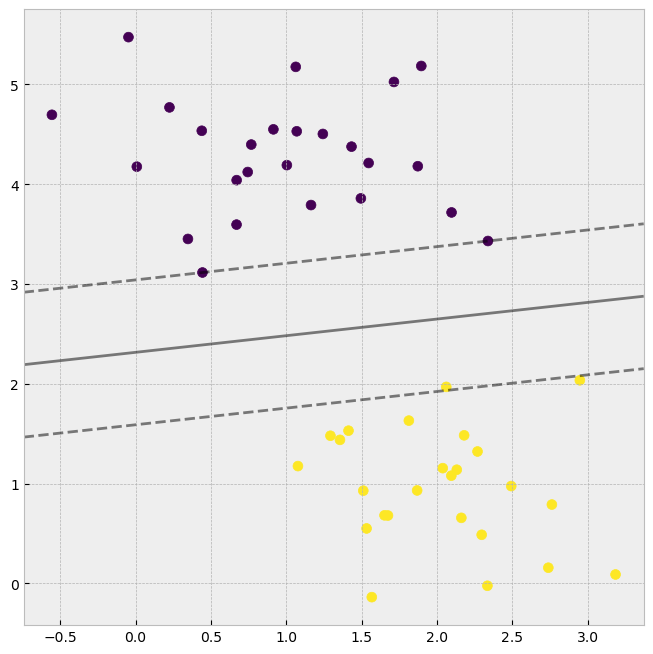

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf)

Notice that the dashed lines touch a couple of the points: these points are the pivotal pieces of this fit, and are known as the *support vectors* (giving the algorithm its name).
In scikit-learn, these are stored in the ``support_vectors_`` attribute of the classifier:

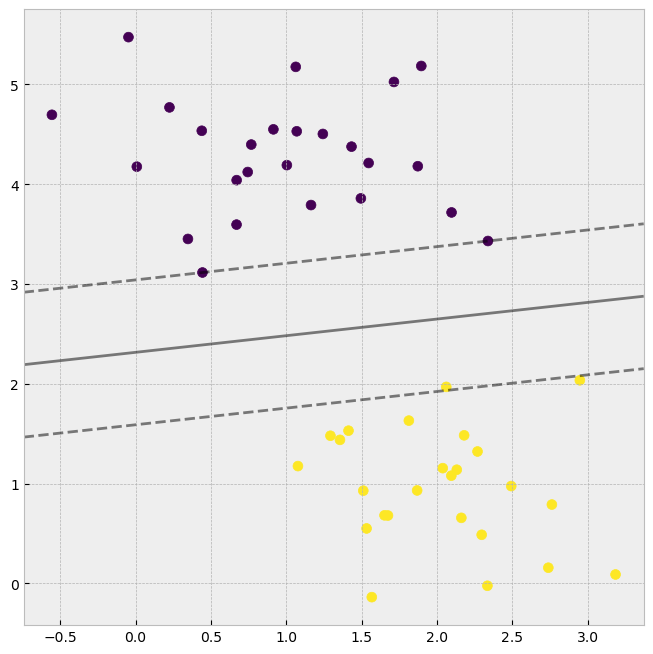

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

### Going beyond classification and regression....

#### Dimensionality Reduction: PCA

Principal Component Analysis (PCA) is a dimension reduction technique that can find the combinations of variables that explain the most variance.

Consider the iris dataset. It cannot be visualized in a single 2D plot, as it has 4 features. We are going to extract 2 combinations of sepal and petal dimensions to visualize it:

In [46]:
# Get features and target variable
target_var_name = 'species'
X_train = train.drop(columns=[target_var_name])
y_train = train[[target_var_name]].values.ravel()
X_test = test.drop(columns=[target_var_name])
y_test = test[[target_var_name]].values.ravel()

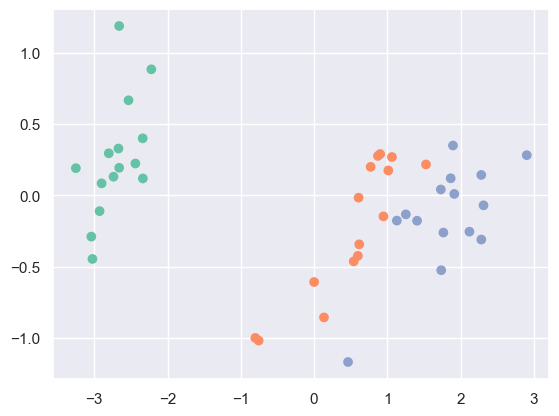

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_train)
X_reduced_train = pca.transform(X_train)
X_reduced_test = pca.transform(X_test)
plt.scatter(X_reduced_test[:, 0], X_reduced_test[:, 1], c=y_test, cmap=cmap)
plt.show()

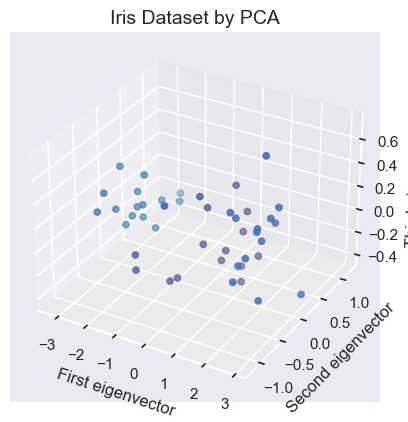

In [49]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d', )

# ax.scatter(X_reduced_train[:,0],X_reduced_train[:,1],X_reduced_train[:,2], c=y_train, cmap=cmap)
ax.scatter(X_reduced_test[:,0],X_reduced_test[:,1],X_reduced_test[:,2], c=y_test, cmap=cmap)
ax.scatter(X_reduced_test[:,0],X_reduced_test[:,1],X_reduced_test[:,2])
ax.set_title('Iris Dataset by PCA', size=14)
ax.set_xlabel('First eigenvector')
ax.set_ylabel('Second eigenvector')
ax.set_zlabel('Third eigenvector')

plt.show()

### Clustering: K-means

Clustering groups together observations that are homogeneous with respect to a given criterion, finding ''clusters'' in the data.

Note that these clusters will uncover relevant hidden structure of the data only if the criterion used highlights it.

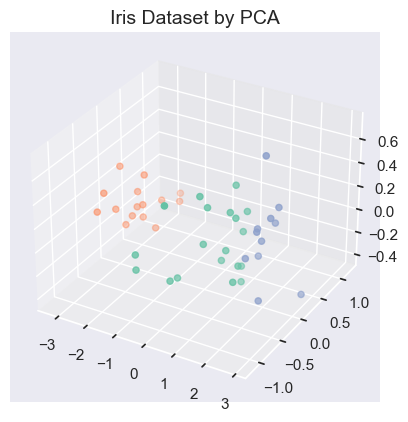

In [51]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, n_init='auto') # Fixing the RNG in kmeans
k_means.fit(X_reduced_train)
y_pred_train = k_means.predict(X_reduced_train)
y_pred_test = k_means.predict(X_reduced_test)

# plt.scatter(X_reduced_test[:, 0], X_reduced_test[:, 1], c=y_pred_test, cmap=cmap)
fig = plt.figure()
ax = fig.add_subplot(projection='3d', )
ax.scatter(X_reduced_test[:,0],X_reduced_test[:,1],X_reduced_test[:,2], c=y_pred_test, cmap=cmap)
ax.set_title('Iris Dataset by PCA', size=14)
plt.show()

Lets then evaluate the performance of the clustering versus the ground truth

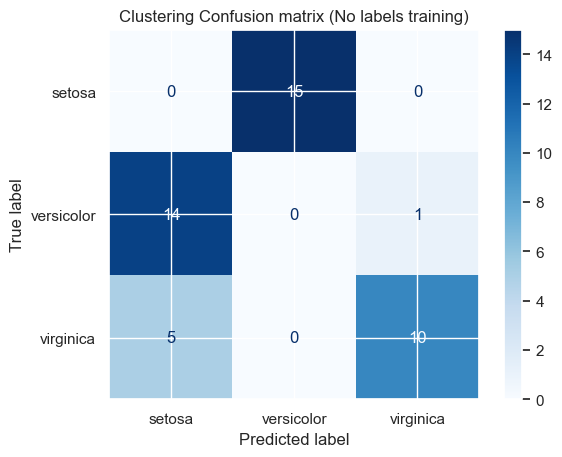

In [53]:
# Confusion Matrix
# replace_dict = {0:1, 1:0, 2:2}
# y_pred_test = [replace_dict[y_temp] for y_temp in y_pred_test]
# cm = confusion_matrix(y_test, n_y_pred_test)
conf_plot = metrics.ConfusionMatrixDisplay.from_predictions( y_test, y_pred_test,
                                           display_labels=iris.target_names,
                                           cmap=plt.cm.Blues,
                                           normalize=None
                                          ) 

# conf_plot.plot()
conf_plot.ax_.set_title('Clustering Confusion matrix (No labels training)')
plt.show()

#### Could you guess why the confusion matrix shows the algorithm is performing well but it still does not show values close to zero out of the diagonal? 

### What is next? 

Notice so far we have **"hand-crafted" the features** to feed our ML model in. For instance, we created some numerical features from every picture (i.e. petal lenght) to give the model an idea of the properties of the objects in the picture. 

The next step is to design models that ***automatically*** learns this kind of features by processing directly the image. In order to learn such representations we leverage on **Deep Learning** models appliedo to computer vision. 

In the next part of this tutorial, **which happens next saturday!**, we will explore: 
* Neural-based Machine Learning
* Deep Learning Archictures for **image classification**

![aa](https://www.researchgate.net/publication/337233389/figure/fig1/AS:838245436887040@1576864694654/A-typical-Convolutional-Neural-Network-architecture-in-aircraft-structural-health.jpg)
* Deep Learning architectures for **image generation**

![aa](https://www.oreilly.com/api/v2/epubs/9781788831307/files/assets/bdfbe2ec-0f06-47ee-b805-057f3369231b.png)